# 📖 Doğal Dil İşleme Dersi Dönem Sonu Projesi  

Bu proje, **Doğal Dil İşleme (NLP) Dersi** kapsamında dönem sonu ödevi olarak geliştirilmiştir. 🎓  
Projenin amacı, Türkçe metin yorumları üzerinde çeşitli NLP tekniklerini uygulayarak anlamlı analizler ve görselleştirmeler sunmaktır.  

## 🎯 **Projenin Amaçları**  
- Türkçe ürün yorumlarını analiz etmek.  
- Duygu analizi ve tutarlılık değerlendirmesi yapmak.  
- Hugging Face gibi modern NLP araçlarını kullanarak derin öğrenme modelleri ile çalışmak.  
- Veri ön işleme, model eğitimi ve sonuçların görselleştirilmesi adımlarını birleştirerek kapsamlı bir NLP projesi oluşturmak.

## 👩‍💻 **Projenin Kapsamı**  
Bu proje, ürün yorumları ile ilgili aşağıdaki adımları içerir:  
1. **Veri ön işleme:** Türkçe metinlerden stopword'leri kaldırma, temizleme ve vektörleştirme.  
2. **Duygu analizi:** Yorumların olumlu, olumsuz ya da nötr olduğunu sınıflandırma.  
3. **Model eğitimi ve değerlendirme:** Derin öğrenme modelleri ile inceleme.

## 🚀 **Neden Bu Proje?**  
- **Türkçe odaklı:** Türkçe NLP üzerine odaklanarak dilsel zorluklara çözüm sunmak.  
- **Modern araçlar:** Hugging Face ve Transformers gibi ileri seviye kütüphanelerle çalışmak.  
- **Gerçek dünya uygulaması:** E-ticaret yorumlarını analiz ederek iş dünyasında kullanılabilir bir model oluşturmak.  

🎓 **Bu projeyi başarıyla tamamlayarak NLP'nin teorik ve pratik yönlerini deneyimlemiş olacağız.**  
Bir sonraki bölümde gerekli kütüphaneleri yüklemeye geçiyoruz! 🚧  


# 📚 Gerekli Kütüphanelerin Yüklenmesi ve NLTK Ayarları

Bu adımda, proje boyunca kullanacağımız tüm kütüphaneleri yüklüyor ve doğal dil işleme (NLP) süreçlerinde ihtiyaç duyulan temel ayarları yapıyoruz. 🚀

---

## 🛠 **Kütüphaneler**
Projemiz için aşağıdaki güçlü Python kütüphanelerini kullanıyoruz:

- **`pandas`**: Veri işleme ve manipülasyonu için.
- **`numpy`**: Sayısal hesaplamalar için.
- **`matplotlib`** ve **`seaborn`**: Veri görselleştirme için.
- **`WordCloud`**: Kelime bulutları oluşturmak için.
- **`scikit-learn`**:
  - Model eğitimi ve test verisi ayırma (**train_test_split**).
  - Metin vektörleştirme yöntemleri (**CountVectorizer, TfidfVectorizer**).
  - Sınıflandırma raporu ve karışıklık matrisi hesaplama.
- **`nltk`**: Doğal dil işleme görevlerinde (örn. stopword çıkarma) kullanılan güçlü bir araç.
- **`tensorflow`**: Derin öğrenme tabanlı analizlerde.
- **`transformers`**: Hugging Face modelleriyle duygu analizi gerçekleştirmek için.

---

## 🧩 **NLTK Ayarları**
Türkçe diline özel metin işleme görevleri için **NLTK** kütüphanesini yapılandırıyoruz:

1. **`punkt`**: Cümle ve kelime ayrıştırma için gerekli.
2. **`stopwords`**: Türkçe anlamsız kelimelerin listesi (örn. "ve", "bir", "ile").

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# TensorFlow ve Transformers
import tensorflow as tf
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Türkçe stopwordleri içerecek şekilde NLTK'yi ayarlayalım
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 📥 Veri Yükleme ve İlk İnceleme  

Bu adımda, Türkçe ürün yorumlarını içeren veri setimizi yüklüyor ve ilk analizleri gerçekleştiriyoruz. Veri seti, e-ticaret ürünlerine yapılan yorumları içeriyor ve projenin temel verisini oluşturuyor.  

---

## 🛠 **Adımlar:**  

### 1️⃣ **Veri Setini Yükleme**  
- Veri seti, belirtilen dosya yolundan `pandas` kullanılarak yüklendi.  
- Çalışma verimizi, daha hızlı işlem yapmak adına **ilk 1000 satır** ile sınırlandırdık.  

In [3]:
# Veri yükleme
file_path = "/kaggle/input/turkish-product-review-dataset/ecommerce_review_dataset.csv" 
data = pd.read_csv(file_path)

# İlk 1000 satırı seçelim
data = data.head(1000)

# Veri yapısını ve ilk birkaç satırı inceleyelim
print("Veri seti hakkında genel bilgiler:")
print(data.info())

print("\nİlk 5 satır:")
print(data.head())

# Eksik değerlerin durumunu kontrol edelim
print("\nEksik değerlerin sayısı:")
print(data.isnull().sum())

# Temel istatistikler
print("\nVerinin temel istatistikleri:")
print(data.describe(include="all"))

Veri seti hakkında genel bilgiler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  1000 non-null   int64 
 1   title       353 non-null    object
 2   review      1000 non-null   object
 3   star        1000 non-null   int64 
 4   clap        1000 non-null   int64 
 5   thumbsdown  1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None

İlk 5 satır:
   product_id                        title  \
0        3696  24 saat olmadan hemen geldi   
1        3696              Kesinlikle alın   
2        3696                        Süper   
3        3696                        hızlı   
4        3696                          NaN   

                                              review  star  clap  thumbsdown  
0  Gerçekten bu kadar hızlı teslimat beklemiyordu...     5     6          18  
1  İlk kullunımda bile kendisini  g

# 🔍 Eksik Verilerin Düzeltilmesi ve Veri Görselleştirme  

Bu adımda, veri setindeki eksik başlıkları doldurduk ve veri setinin öne çıkan özelliklerini görselleştirerek analizimize başladık. Bu süreç, veriyi anlamak ve içindeki dağılımları keşfetmek için oldukça önemli bir adımdır.  

---

## 🛠 **Adımlar:**  

### 1️⃣ **Eksik Başlıkların Doldurulması**  
- **`title`** sütununda eksik olan değerleri, anlamlı bir etiket olan **"Eksik Başlık"** ile doldurduk.  
- Bu işlem, eksik verilerin veri analizini etkilemesini önlemek için kritik bir adımdır.  


Güncellenmiş veri seti boyutu: (1000, 6)


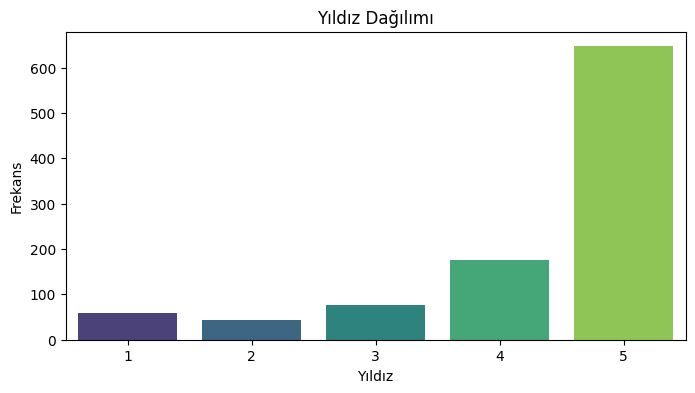

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


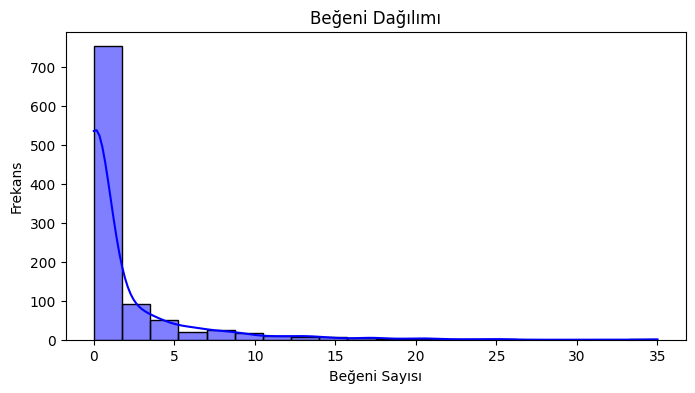

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


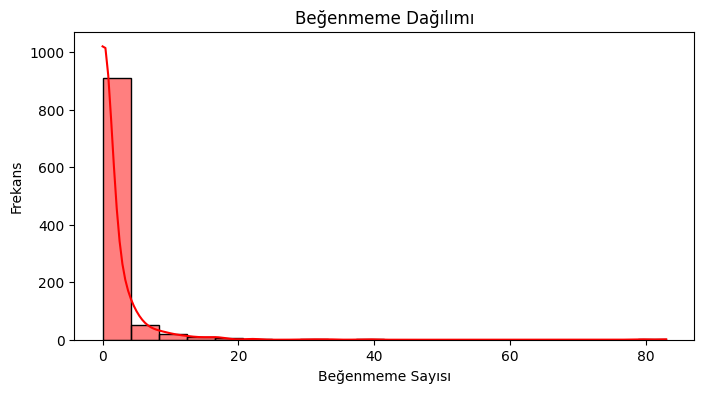

In [4]:
# Eksik değerleri "Eksik Başlık" ile doldurma
data["title"].fillna("Eksik Başlık", inplace=True)

# Güncellenmiş veri setinin boyutunu kontrol etme
print(f"Güncellenmiş veri seti boyutu: {data.shape}")

# Star dağılımını görselleştirme
plt.figure(figsize=(8, 4))
sns.countplot(x="star", data=data, palette="viridis")
plt.title("Yıldız Dağılımı")
plt.xlabel("Yıldız")
plt.ylabel("Frekans")
plt.show()

# Clap dağılımı
plt.figure(figsize=(8, 4))
sns.histplot(data["clap"], kde=True, color="blue", bins=20)
plt.title("Beğeni Dağılımı")
plt.xlabel("Beğeni Sayısı")
plt.ylabel("Frekans")
plt.show()

# Thumbsdown dağılımı
plt.figure(figsize=(8, 4))
sns.histplot(data["thumbsdown"], kde=True, color="red", bins=20)
plt.title("Beğenmeme Dağılımı")
plt.xlabel("Beğenmeme Sayısı")
plt.ylabel("Frekans")
plt.show()

# 🧹 Türkçe Metin Ön İşleme ve Kelime Bulutu Oluşturma  

Bu bölümde, kullanıcı yorumlarını temizleyip Türkçe dil özelliklerine uygun hale getirdik. Ayrıca, tüm yorumlardan oluşan bir kelime bulutu oluşturarak metinlerdeki en sık kullanılan kelimeleri görselleştirdik. Bu süreç, metinlerin analiz için optimize edilmesini ve önemli anahtar kelimelerin öne çıkarılmasını sağlar.  

---

## 🛠 **Adımlar:**  

### 1️⃣ **Türkçe Stopwords Listesi**  
- **Stopwords**: Türkçe'de sıkça kullanılan ancak analize anlamlı bir katkısı olmayan kelimelerdir (ör. "ve", "bir", "ile").  
- `nltk` kütüphanesinden Türkçe stopwords listesini aldık.  

Temizlenmiş Yorumlar:
0    gerçekten kadar hızlı teslimat beklemiyordum 2...
1    ilk kullunımda bile kendisini gösteriyor düşün...
2    paketleme bölümünden barış beye teşekkür ederi...
3                                               guzell
4                 teşekkürler hızlı kargo ürün orjinal
Name: cleaned_review, dtype: object


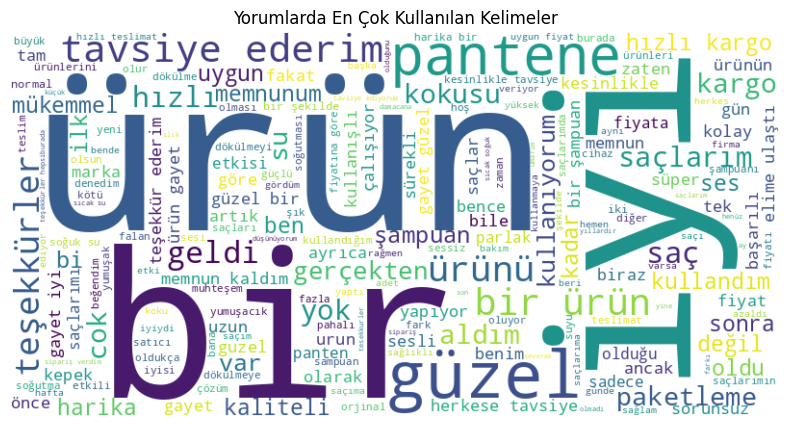

In [5]:
# Türkçe stopwords listesini alalım
turkish_stopwords = set(stopwords.words('turkish'))

def preprocess_text(text):
    # Küçük harfe çevirme
    text = text.lower()
    # Noktalama işaretlerini kaldırma
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    # Tokenization
    tokens = word_tokenize(text)
    # Stopwords temizleme
    tokens = [word for word in tokens if word not in turkish_stopwords]
    # Tekrar birleştirme
    return ' '.join(tokens)

# "review" sütununda ön işleme
data["cleaned_review"] = data["review"].apply(preprocess_text)

# İlk birkaç temizlenmiş yorumu inceleme
print("Temizlenmiş Yorumlar:")
print(data["cleaned_review"].head())

# Kelime bulutu oluşturma
all_words = ' '.join(data["cleaned_review"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Yorumlarda En Çok Kullanılan Kelimeler")
plt.show()


# 🌟 Hugging Face ile Türkçe Duygu Analizi  

Bu bölümde, **Hugging Face** üzerinden bir Türkçe duygu analizi modeli kullanarak yorumların duygu durumlarını analiz ettik. Bu işlem, metinlerin olumlu, olumsuz veya nötr olduğunu belirlememize yardımcı olur ve sonraki süreçlerde kullanmak üzere yorumlara anlam kazandırır.  

---

## 🚀 **Adımlar:**  

### 1️⃣ **Hugging Face Duygu Analizi Modelini Yükleme**  
Hugging Face'in `transformers` kütüphanesi, doğal dil işleme modelleri için kullanımı kolay bir altyapı sağlar. Bu projede, **`savasy/bert-base-turkish-sentiment-cased`** adlı Türkçe duygu analizi modelini kullandık.  

- **Modelin Özelliği**: Türkçe metinlerde duygu analizi yapma (olumlu, olumsuz, nötr).  
- **Pipeline**: Model ve tokenizer işlemlerini basitleştirerek hızlı sonuç üretir. 

In [6]:
# Hugging Face üzerinden Türkçe duygu analizi modeli yükleme
from transformers import pipeline

# Türkçe duygu analizi modeli
sentiment_pipeline = pipeline("sentiment-analysis", model="savasy/bert-base-turkish-sentiment-cased")

# Örnek yorumlarla testi gerçekleştirme (verinin ilk 5 satırını alıyoruz)
sample_reviews = data["cleaned_review"].head(5).tolist()
sentiment_results = sentiment_pipeline(sample_reviews)

# Sonuçları inceleme
for review, result in zip(sample_reviews, sentiment_results):
    print(f"Yorum: {review}\nDuygu Analizi Sonucu: {result}\n")

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Yorum: gerçekten kadar hızlı teslimat beklemiyordum 24 saat geçmeden kargom geldi orjinal ürün kullanılmamış güvenle tavsiye ederim teşekkürler
Duygu Analizi Sonucu: {'label': 'positive', 'score': 0.6188211441040039}

Yorum: ilk kullunımda bile kendisini gösteriyor düşünmeden alın
Duygu Analizi Sonucu: {'label': 'positive', 'score': 0.9960417747497559}

Yorum: paketleme bölümünden barış beye teşekkür ederimen baştan beni kullanmam gereken şampuanı buldum tavsiye edeirm
Duygu Analizi Sonucu: {'label': 'negative', 'score': 0.9777641296386719}

Yorum: guzell
Duygu Analizi Sonucu: {'label': 'positive', 'score': 0.9316493272781372}

Yorum: teşekkürler hızlı kargo ürün orjinal
Duygu Analizi Sonucu: {'label': 'positive', 'score': 0.9665146470069885}



# 🎯 Hugging Face ile Fine-Tuning Hazırlıkları  

Bu bölümde, veri setimizi Hugging Face'in modelleri için uygun bir formata dönüştürerek **fine-tuning** işlemine hazırladık. Bu adımlar, modelin duygu analizi görevine özgü şekilde eğitilmesini sağlar.  

---

## 🚀 **Adımlar:**  

### 1️⃣ **Yıldız Puanlarına Göre Duygu Etiketleme**  
- Yıldız puanlarına dayanarak yorumlara **duygu etiketleri** atandı:  
  - **1-2 yıldız**: "negative"  
  - **3 yıldız**: "neutral"  
  - **4-5 yıldız**: "positive"  

In [7]:
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Yıldızlara göre otomatik etiketleme
def assign_sentiment(star):
    if star <= 2:
        return "negative"
    elif star == 3:
        return "neutral"
    else:
        return "positive"

# Yorumları etiketleme
data["sentiment"] = data["star"].apply(assign_sentiment)

# Fine-tuning için Hugging Face Dataset formatına dönüştürme
dataset = data[["cleaned_review", "sentiment"]].head(100)
dataset = Dataset.from_pandas(dataset)

# Dataset'i train-test olarak ayırma
train_test_split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

# Tokenizer yükleme
model_name = "savasy/bert-base-turkish-sentiment-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenization
def tokenize_function(example):
    return tokenizer(example["cleaned_review"], truncation=True, padding="max_length", max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Dataset formatını ayarlama
train_dataset = train_dataset.rename_column("sentiment", "label")
test_dataset = test_dataset.rename_column("sentiment", "label")

# Etiketleri sayısal hale getirme
label_mapping = {"positive": 2, "neutral": 1, "negative": 0}
train_dataset = train_dataset.map(lambda x: {"label": label_mapping[x["label"]]})
test_dataset = test_dataset.map(lambda x: {"label": label_mapping[x["label"]]})

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

print("Fine-tuning için veri hazır.")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Fine-tuning için veri hazır.


# 🎓 Hugging Face ile Fine-Tuning ve Model Değerlendirme  

Bu bölümde, modelimizi fine-tuning yaparak Türkçe duygu analizi görevine özel olarak optimize ettik. Eğitimi tamamladıktan sonra modeli değerlendirdik ve sonuçları analiz ettik.  

---

## 🚀 **Adımlar:**  

### 1️⃣ **Model Yükleme ve Eğitim Parametreleri Ayarlama**  
- **`savasy/bert-base-turkish-sentiment-cased`** modelini yeniden yükledik ve yeni görev için uygun hale getirdik.  
- Eğitim parametreleri, Hugging Face **`TrainingArguments`** kullanılarak belirlendi:  
  - **Epoch Sayısı**: 5  
  - **Öğrenme Oranı**: 2e-5  
  - **Batch Boyutu**: 8  
  - **Weight Decay**: 0.01  
  - **Değerlendirme Stratejisi**: Epoch bazında

In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Modeli yeniden yükleme
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3, ignore_mismatched_sizes=True)

# Eğitim parametrelerini yeniden ayarlama
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,  # Batch size'ı düşürdük
    per_device_eval_batch_size=8,
    num_train_epochs=5,  # Epoch sayısını düşürdük
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    report_to="none"  # WandB entegrasyonunu devre dışı bırakma
)

# Değerlendirme metriklerini tanımlama
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    accuracy = accuracy_score(p.label_ids, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Trainer oluşturma
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Modeli eğitme
trainer.train()

# Eğitimi tamamladıktan sonra modeli kaydetme
trainer.save_model("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")

# Modeli değerlendirme
eval_results = trainer.evaluate()
print(f"Değerlendirme Sonuçları: {eval_results}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at savasy/bert-base-turkish-sentiment-cased and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.922000,0.605492,0.700000,0.490000,0.700000,0.576471
2,0.573800,0.492930,0.800000,0.794444,0.800000,0.755357
3,0.406800,0.462333,0.850000,0.826471,0.850000,0.819758
4,0.323700,0.450016,0.900000,0.862500,0.900000,0.875556
5,0.270200,0.444548,0.900000,0.862500,0.900000,0.875556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Değerlendirme Sonuçları: {'eval_loss': 0.44454774260520935, 'eval_accuracy': 0.9, 'eval_precision': 0.8625, 'eval_recall': 0.9, 'eval_f1': 0.8755555555555556, 'eval_runtime': 0.1014, 'eval_samples_per_second': 197.308, 'eval_steps_per_second': 29.596, 'epoch': 5.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 🔍 Model ile Tahmin ve Tutarsızlık Analizi  

Bu bölümde, fine-tuned modelimizi kullanarak Türkçe ürün yorumlarını analiz ettik, tahmin sonuçlarını elde ettik ve yorumların yıldız puanları ile uyumlu olup olmadığını inceledik. Tutarsızlıkları tespit ettikten sonra, bunları ayrı bir dosyaya kaydettik.  

---

## 🚀 **Adımlar:**  

### 1️⃣ **Model ve Tokenizer Yükleme**  
- **Fine-Tuned Model**: Daha önce eğittiğimiz modeli ve tokenizer'ı yükledik.  
- Model, GPU veya CPU kullanılarak çalıştırılacak şekilde ayarlandı.  

In [9]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Model ve tokenizer yükleme
model_name = "./fine_tuned_model"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# GPU kontrolü
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Veri setini yükleme
data = pd.read_csv("/kaggle/input/turkish-product-review-dataset/ecommerce_review_dataset.csv")
dataset = data[["review", "star"]]

# Yıldız sayısına göre duygu etiketlerini belirleme fonksiyonu
def map_star_to_sentiment(star):
    if star in [1, 2]:
        return 0  # Negative
    elif star == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

# Toplu tahmin fonksiyonu
def batch_predict(reviews, batch_size=32):
    results = []
    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        batch_predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
        results.extend(batch_predictions)
    return results

# Tahminleri hesaplama
predictions = batch_predict(dataset["review"].tolist())
dataset["prediction"] = predictions
dataset["true_sentiment"] = dataset["star"].apply(map_star_to_sentiment)

# Tutarsızlıkları bulma
inconsistencies = dataset[
    ((dataset["true_sentiment"] == 0) & (dataset["prediction"] == 2)) |
    ((dataset["true_sentiment"] == 2) & (dataset["prediction"] == 0)) |
    ((dataset["true_sentiment"] == 1) & ((dataset["prediction"] == 0) | (dataset["prediction"] == 2)))
]

# Tutarsızlıkları CSV'ye kaydetme
inconsistencies.to_csv("tutarsizlar.csv", index=False)
print("Tutarsızlıklar inconsistencies.csv dosyasına kaydedildi.")


<ipython-input-9-9ab0f4fa063f>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["prediction"] = predictions
<ipython-input-9-9ab0f4fa063f>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["true_sentiment"] = dataset["star"].apply(map_star_to_sentiment)


Tutarsızlıklar inconsistencies.csv dosyasına kaydedildi.


🎉 **Projemizin Sonuna Geldik!**

Merhaba! Ben **Aslı Şemşimoğlu**, bu projeyi **Doğal Dil İşleme (NLP) Dersi Dönem Sonu Projesi** olarak geliştirdim. 💻✨  

---

🌟 **Projemizde Neler Yaptık?**  
Bu projede, Türkçe ürün yorumlarını analiz ettim. İşte proje boyunca yaptığım başlıca çalışmalar:  
- **Veri Temizleme ve Ön İşleme:** Yorumları düzenledim, stopwords’leri temizledim ve metinleri analize uygun hale getirdim.  
- **Duygu Analizi:** Hugging Face modelleri ile Türkçe duygu analizi gerçekleştirdim.  
- **Model Fine-Tuning:** Mevcut bir modeli kendi veri setim üzerinde eğiterek performansını artırdım.  
- **Tutarsızlık Tespiti:** Yıldız puanları ile duygu analizi sonuçlarını karşılaştırarak tutarsız yorumları tespit ettim.  

Bu süreçte NLP’nin temel tekniklerini derinlemesine öğrenme ve uygulama fırsatı buldum. 🚀  

---

🔗 **Beni Takip Edin!**  
Projelerimi ve çalışmalarımı daha yakından takip etmek veya benimle iletişim kurmak isterseniz aşağıdaki bağlantılardan ulaşabilirsiniz:  

- 💻 [Kaggle](https://www.kaggle.com/aslemimolu)  
- 💼 [LinkedIn](https://www.linkedin.com/in/aslisemsimoglu/)  
- 📊 [GitHub](https://github.com/aslisemsimoglu)  

---

💬 **Geri Bildirimleriniz Önemli!**  
Bu proje ile ilgili görüşlerinizi paylaşmak, önerilerde bulunmak veya bana sorular sormak isterseniz her zaman ulaşabilirsiniz. 😊  
Bir sonraki projelerde de sizinle buluşmak dileğiyle!  

Teşekkürler ve iyi çalışmalar dilerim! 👋✨  
